# Retail Performance Analysis Report

## Overview
The project aims to analyse the sales performance of a retail store from 2023 to 2025, The goal is to identify high performing products in terms of sales and profits,understand customer demographics, evluate regional and city level performance. It also explores montly sales and profit trends to uncover seasonal patterns.

Findings from this analysis aim to guide in making data driven decisions in marketing focus, inventory planning and pricing strategies.

## Project Objectives
1. Evaluate total sales and profit trends across months,region,cities and product category
2. Identify top performing products in each region
3. Segment customer data by age group to understand spending behaviours
4. Asessing store level performance by sales and profit contribution
5. Asess montly profit pattern to detect seasonal variations

## Tools Used
- Language: Python
- Libraries: pandas,matplotlib and seaborn
- Environment: Jupyter Notebook and VS code



## Dataset
1. It has 10,000 unique orders
2. Timeframe: 2023-2025
3. Columns: Order_ID, Order_Date, Customer_ID, Gender, Customer_Age, Region, Store_Location, Product_Category, Product_Name, Quantity, Unit_Price, Discount, Sales, Cost	Profit_Channel, Payment_Method


## Methodology
1. Data Cleaning and Preparation
   - Checked for missing and duplicate values
   - Converted Order dates to datetime column
   - Extracted Month and Year columns for the trend analysis
   - Ordered the dates for months to enable chronological visualisation
2. Data Processing
   - Tracked monthly profit for 2024 and 2025.
   - Grouped and aggregated data by Region,Store location and Product Category
   - Identified top products in each region
   - Segmented data for each age groups

In [104]:
# Importing Libraries and Loading Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/user/Downloads/retail_sales_dataset_no_satisfaction.csv")

In [121]:
# Data Quality Checks
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          10000 non-null  object        
 1   Order_Date        10000 non-null  datetime64[ns]
 2   Customer_ID       10000 non-null  object        
 3   Gender            10000 non-null  object        
 4   Customer_Age      10000 non-null  int64         
 5   Region            10000 non-null  object        
 6   Store_Location    10000 non-null  object        
 7   Product_Category  10000 non-null  object        
 8   Product_Name      10000 non-null  object        
 9   Quantity          10000 non-null  int64         
 10  Unit_Price        10000 non-null  float64       
 11  Discount          10000 non-null  float64       
 12  Sales             10000 non-null  float64       
 13  Cost              10000 non-null  float64       
 14  Profit            10000

In [106]:
# Data Cleaning: Checking for nulls and duplicates
df.duplicated().sum()
df.isnull().sum()
# Convert 'Order Date' column to Datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.dtypes

Order_ID                    object
Order_Date          datetime64[ns]
Customer_ID                 object
Gender                      object
Customer_Age                 int64
Region                      object
Store_Location              object
Product_Category            object
Product_Name                object
Quantity                     int64
Unit_Price                 float64
Discount                   float64
Sales                      float64
Cost                       float64
Profit                     float64
Channel                     object
Payment_Method              object
dtype: object

In [123]:
# Extract Year and Month from the 'Order Date' column,and store in new columns
df['Year'] = df['Order_Date'].dt.year
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month_Name'] = df['Order_Date'].dt.strftime('%b')
monthly_profit = df.groupby(['Year','Month_Name'])['Profit'].sum()
monthly_profit_df = monthly_profit.reset_index()
monthly_profit_df['Month_Name'] = pd.Categorical(
    monthly_profit_df['Month_Name'],
    categories=month_order,
    ordered=True
)
# Get monthly profit
monthly_profit_df = monthly_profit_df.sort_values('Month_Name').reset_index(drop=True)
# Filter monthly profit for the year 2024 and 2025
profit_2024 = monthly_profit_df[monthly_profit_df['Year'] == 2024]
profit_2024
profit_2025 = monthly_profit_df[monthly_profit_df['Year'] == 2025]
profit_2025

,Year,Month_Name,Profit
0,2025,Jan,257382.24
2,2025,Feb,203967.37
5,2025,Mar,244661.51
7,2025,Apr,226716.13
8,2025,May,245418.53
10,2025,Jun,240753.04
13,2025,Jul,228720.92
14,2025,Aug,184095.94
17,2025,Sep,230268.50
18,2025,Oct,210363.17


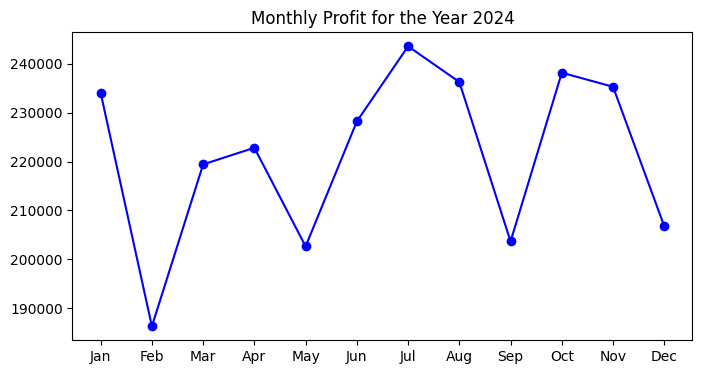

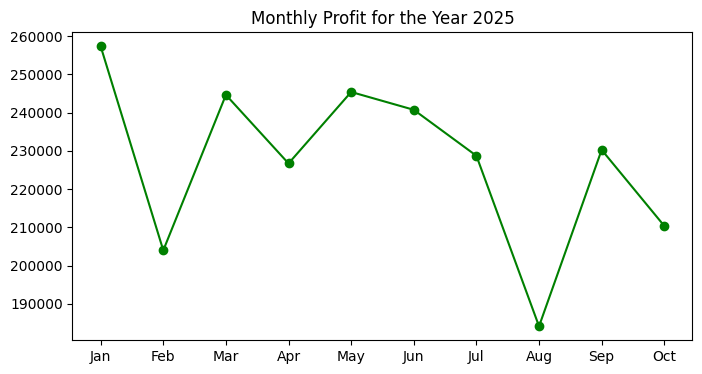

In [108]:
# Plot month and profit for 2024 
plt.figure(figsize=(8,4))
plt.title('Monthly Profit for the Year 2024')
plt.plot(profit_2024['Month_Name'],profit_2024['Profit'], marker='o',label='Profit', color='blue')
plt.show()

# Plot month and profit for 2025
plt.figure(figsize=(8,4))
plt.title('Monthly Profit for the Year 2025')
plt.plot(profit_2025['Month_Name'],profit_2025['Profit'], marker='o',label='Profit', color='green')
plt.show()

### Insights
- 2025 shows an upward trend in profitability compared to 2024 indicating buisness growth.
- High profits in January and July for both years suggest strong mid year performance and post holiday cycles.
- Drop in profits observed in both years may be due to factors like operational inefficiencies,pricing issues or reduced customer activity,Identifying root causes can help in mitigating similar dips in future years.

In [ ]:
# Group sales by region and profit
regional_sales = df.groupby('Region')['Sales'].sum().reset_index()
regional_profit = df.groupby('Region')['Profit'].sum().reset_index()
regional_sales

,Region,Sales
0,Africa,10177464.94
1,Asia,9841974.11
2,Europe,9503062.57
3,North America,9786234.80
4,South America,10219195.00


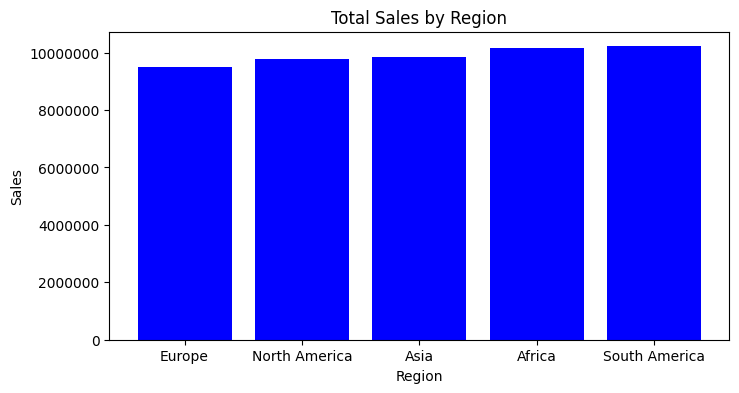

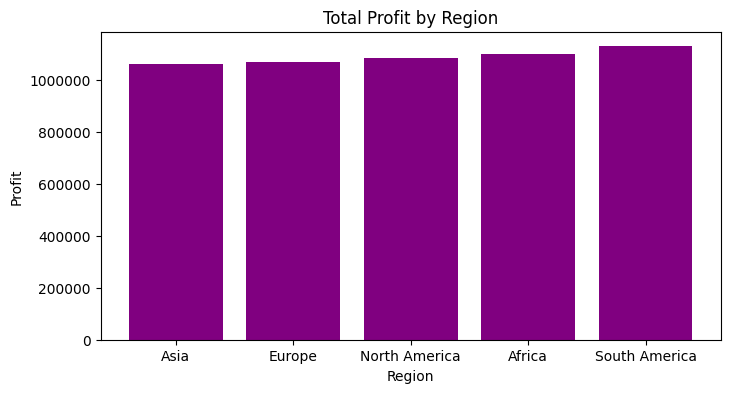

In [128]:
# Visualize Sales against Region
plt.figure(figsize=(8,4))
plt.title('Total Sales by Region')
plt.bar(regional_sales['Region'],regional_sales['Sales'], color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Sales")
plt.xlabel('Region')

# Visualise Profit against Region
plt.figure(figsize=(8,4))
plt.title('Total Profit by Region')
plt.bar(regional_profit['Region'],regional_profit['Profit'], color='purple')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.show()

### Insights
- South America and Africa consistently lead in both sales and profit,indicating strong demand.
- Despite Asia's higher sales,profits remain slightly lower than expected.
- North America show slightly lower sales and an higher profit margin.

In [126]:
# Identify Top 10 stores by sales
store_location_sales = df.groupby('Store_Location')['Sales'].sum().head(10)
store_location_sales = store_location_sales.sort_values().reset_index()

# Identify Top 10 stores by profit
store_location_profit = df.groupby('Store_Location')['Profit'].sum().head(10)
store_location_profit = store_location_profit.sort_values().reset_index()
store_location_profit

,Store_Location,Profit
0,Abbottton,64.81
1,Abigailfort,65.41
2,Acostamouth,324.46
3,Aaronshire,324.72
4,Abigailbury,479.25
5,Abigailborough,485.09
6,Acevedobury,748.23
7,Aaronbury,1250.35
8,Abigailshire,1319.65
9,Aaronburgh,1464.15


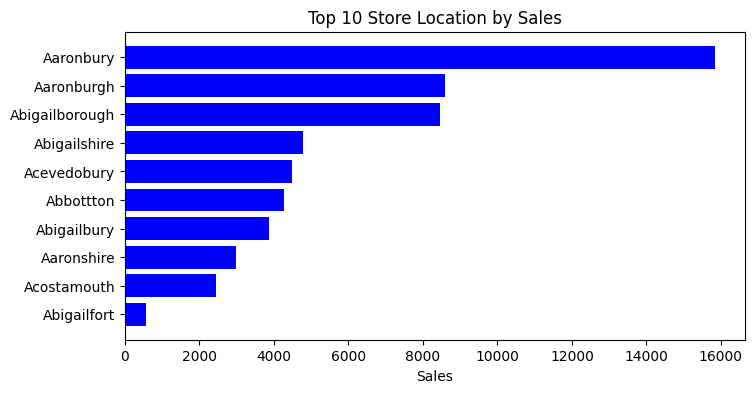

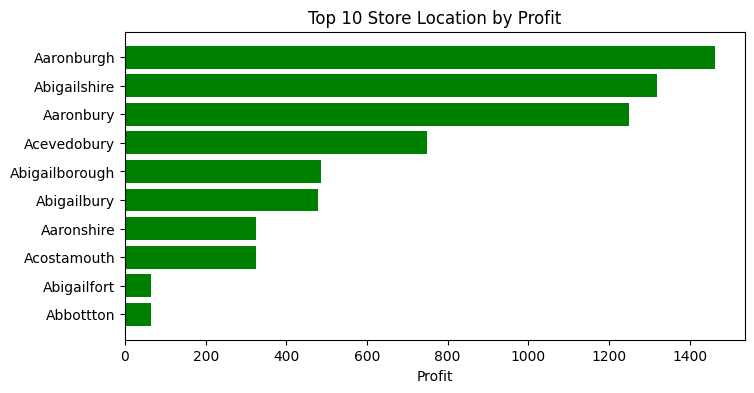

In [112]:
# Visualise Store Location and Sales
plt.figure(figsize=(8,4))
plt.barh(store_location_sales['Store_Location'],store_location_sales['Sales'],color='blue')
plt.title("Top 10 Store Location by Sales")
plt.xlabel("Sales")
plt.ylabel("")
plt.show()

# Visualise Store Location and Profit
plt.figure(figsize=(8,4))
plt.barh(store_location_profit['Store_Location'],store_location_profit['Profit'],color='green')
plt.title("Top 10 Store Location by Profit")
plt.xlabel("Profit")
plt.ylabel("")
plt.show()

### Insights
- Aaronbury and Aaronburgh are the highest sales and profit drivers.
- Abigailshire shows high sales to profit margin,where slightly lower sales yield higher profitability.
- Acostamouth, Abigailforth and Abbottton have the lowest sales and profit.

In [127]:
# Group profit by Product category
product_category_profit = df.groupby('Product_Category')['Profit'].sum()
product_category_profit = product_category_profit.reset_index().sort_values(by='Profit', ascending=True)
product_category_profit


# Group Sales by Product Category
product_category_sales = df.groupby('Product_Category')['Sales'].sum()
product_category_sales = product_category_sales.reset_index().sort_values(by='Sales', ascending=True)
product_category_sales
product_category_profit

,Product_Category,Profit
3,Groceries,829872.84
1,Clothing,918252.22
4,Home Decor,918356.88
5,Sports,919849.69
0,Beauty,923609.22
2,Electronics,939680.70


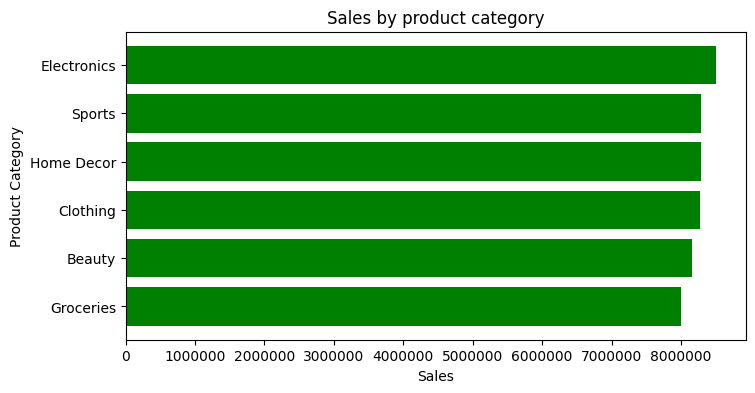

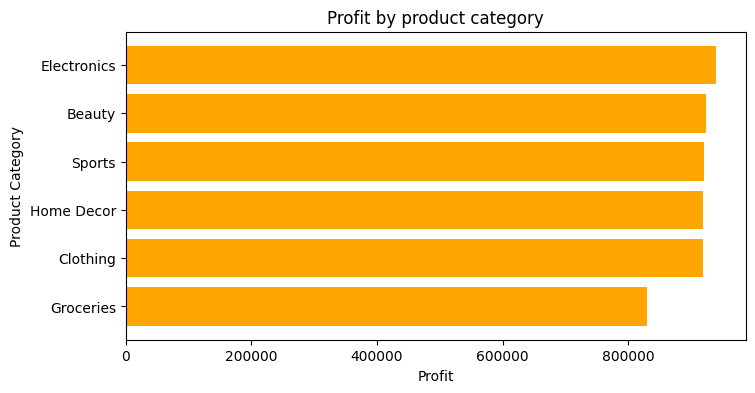

In [114]:
# Visualise Sales and Product Category
plt.figure(figsize=(8,4))
plt.barh(product_category_sales['Product_Category'],product_category_sales['Sales'],color='green')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Sales")
plt.ylabel("Product Category")
plt.title("Sales by product category")
plt.show()

# Visualise Profit and Product Category
plt.figure(figsize=(8,4))
plt.barh(product_category_profit['Product_Category'],product_category_profit['Profit'],color='orange')
plt.xlabel("Profit")
plt.ylabel("Product Category")
plt.title("Profit by product category")
plt.show()

### Insights
- All product categories show solid overall performance in sales and profits.
- Electronics consistently lead in both sales and profits making it the strongest performer.
- Beauty achieves strong profit despite moderate sales.
- Groceries underperform in both sales and profit.

In [115]:
# Identify top 10 Products by Sales in each Region
top_product_sales =(
                    df.groupby(['Region','Product_Category'])['Sales']
                    .sum()
                    .reset_index()
                    .sort_values(['Region','Sales'])
)
top_products_sales = top_product_sales.groupby('Region').head(5)
top_products_sales

,Region,Product_Category,Sales
3,Africa,Groceries,1465593.67
0,Africa,Beauty,1622537.92
1,Africa,Clothing,1693366.73
2,Africa,Electronics,1756648.38
4,Africa,Home Decor,1761894.52
10,Asia,Home Decor,1467601.47
9,Asia,Groceries,1610488.17
7,Asia,Clothing,1615989.96
11,Asia,Sports,1643305.24
8,Asia,Electronics,1667432.87


In [116]:
# Identify top 10 products by Sales in africa
top_product_sales_africa = top_product_sales[top_product_sales['Region'] == 'Africa'].sort_values(by='Sales',ascending=False).copy()
top_product_sales_africa

# Identify top 10 product by sales in asia
top_product_sales_asia = top_product_sales[top_product_sales['Region'] == 'Asia'].copy()
top_product_sales_asia

# Identify top 10 products by sales in Europe
top_product_sales_europe = top_product_sales[top_product_sales['Region'] == 'Europe'].sort_values(by='Sales',ascending=False).copy()
top_product_sales_europe

# Identify top 10 product by Sales in North America
top_product_sales_na = top_product_sales[top_product_sales['Region'] == 'North America'].copy()
top_product_sales_na

# Identify top 10 product by sales in South America
top_product_sales_sa = top_product_sales[top_product_sales['Region'] == 'South America'].copy()
top_product_sales_sa


,Region,Product_Category,Sales
27,South America,Groceries,1565925.56
25,South America,Clothing,1642775.26
29,South America,Sports,1664733.71
28,South America,Home Decor,1695923.47
24,South America,Beauty,1789729.39
26,South America,Electronics,1860107.61


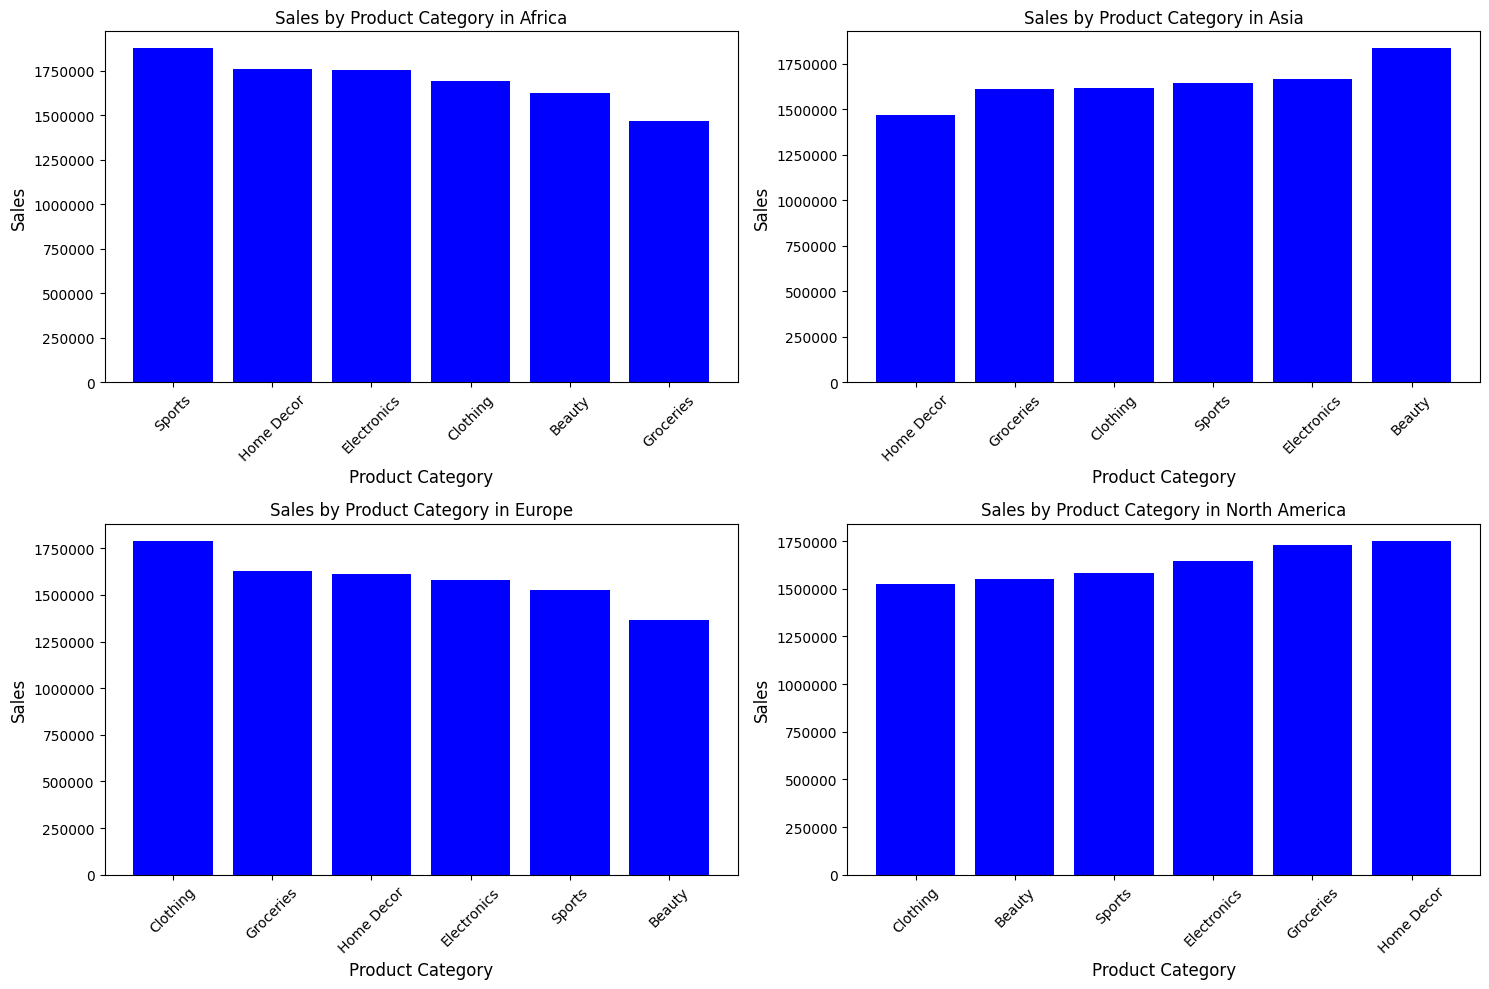

In [117]:
# Set up Subplots
fig,axes = plt.subplots(2,2, figsize = (15,10))

# Africa: Plot Sales and product category
axes[0,0].set_title("Sales by Product Category in Africa")
axes[0,0].bar(top_product_sales_africa['Product_Category'],top_product_sales_africa['Sales'],color='blue')
axes[0,0].set_xlabel("Product Category",fontsize=12)
axes[0,0].set_ylabel("Sales",fontsize=12)
axes[0,0].tick_params(axis='x',rotation=45)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Asia: Plot Sales and product category
axes[0,1].set_title("Sales by Product Category in Asia")
axes[0,1].bar(top_product_sales_asia['Product_Category'],top_product_sales_asia['Sales'],color='blue')
axes[0,1].set_xlabel("Product Category",fontsize=12)
axes[0,1].set_ylabel("Sales",fontsize=12)
axes[0,1].tick_params(axis='x',rotation=45)
axes[0,1].ticklabel_format(style='plain',axis='y')

# Europe: Plot sales and product category 
axes[1,0].set_title("Sales by Product Category in Europe")
axes[1,0].bar(top_product_sales_europe['Product_Category'],top_product_sales_europe['Sales'],color='blue')
axes[1,0].set_xlabel("Product Category",fontsize=12)
axes[1,0].set_ylabel("Sales",fontsize=12)
axes[1,0].tick_params(axis='x',rotation=45)
axes[1,0].ticklabel_format(style='plain',axis='y')

# Europe: Plot sales and product category
axes[1,0].set_title("Sales by Product Category in Europe")
axes[1,0].bar(top_product_sales_europe['Product_Category'],top_product_sales_europe['Sales'],color='blue')
axes[1,0].set_xlabel("Product Category",fontsize=12)
axes[1,0].set_ylabel("Sales",fontsize=12)
axes[1,0].tick_params(axis='x',rotation=45)
axes[1,0].ticklabel_format(style='plain',axis='y')

# North America: Plot sales and product category 
axes[1,1].set_title("Sales by Product Category in North America")
axes[1,1].bar(top_product_sales_na['Product_Category'],top_product_sales_na['Sales'],color='blue')
axes[1,1].set_xlabel("Product Category",fontsize=12)
axes[1,1].set_ylabel("Sales",fontsize=12)
axes[1,1].tick_params(axis='x',rotation=45)
axes[1,1].ticklabel_format(style='plain',axis='y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

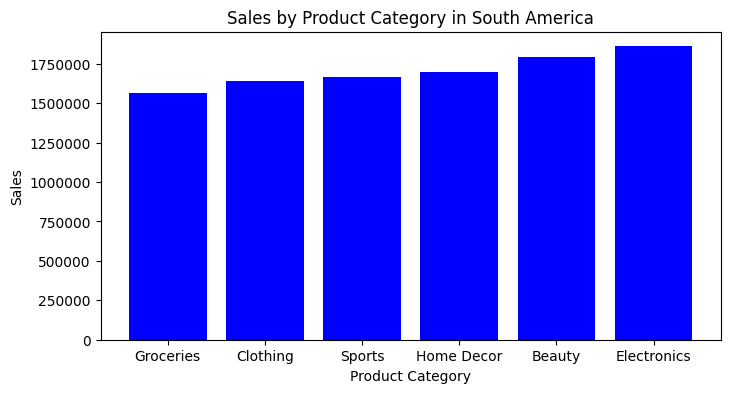

In [118]:
# South America: Plot Sales and products in South America
plt.figure(figsize=(8,4))
plt.bar(top_product_sales_sa['Product_Category'],top_product_sales_sa['Sales'],color='blue')
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.title("Sales by Product Category in South America")
plt.ticklabel_format(style='plain',axis='y')

### Insights
- Sports, Home Decor and Electronics dominate sales in Africa
- Beauty, Electronics and Sport perform best in terms of sales in Asia
- In Europe, Clothing, Groceries and Home Decor lead sales 
- Home Decor and Groceries are key sales driver
- In South America, Electronics and Beauty products dominate sales

In [119]:
# Group Sales by Age brackets
bins = [0,18,35,49,65]
labels = ['0-18','19-35','36-49','50-65']
df['Age_Group'] = pd.cut(df['Customer_Age'],bins=bins,labels=labels,include_lowest=True)

age_group_sales = df.groupby('Age_Group',observed=False)['Sales'].sum().reset_index()
age_group_sales

,Age_Group,Sales
0,0-18,1132225.10
1,19-35,17520266.38
2,36-49,14594016.86
3,50-65,16281423.08


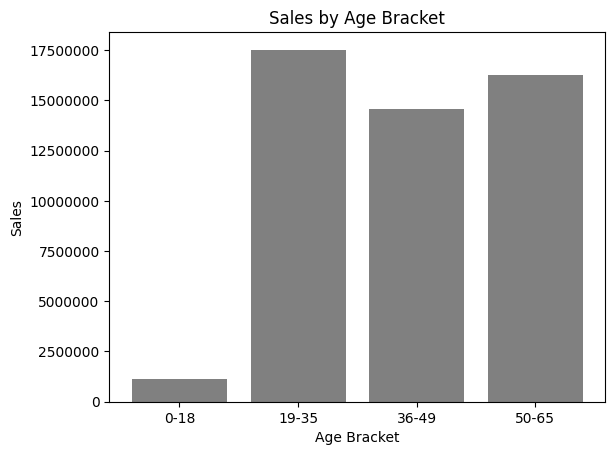

In [120]:
# Show Sales by Age bracket
plt.bar(age_group_sales['Age_Group'],age_group_sales['Sales'],color='gray')
plt.title("Sales by Age Bracket")
plt.xlabel("Age Bracket")
plt.ylabel("Sales")
plt.ticklabel_format(style='plain',axis='y')

### Insights:
- Age 19-35 generate the highest sales,making them the main revenue segment
- Age 50-65 also show strong purchasing power

## Recommendations for the Retail Store:
1. Prioritize high performing region,stores and segments and customer age groups
   - Focus resources, marketing and inventory in top regions (South America and Africa) ,top stores(Aaronbury and Aaronburgh), core customer age groups(19-35 and 50-65) as they drive majority of sales and profits.
   - Invest in high margin product categories like Electronics and Beauty to maximize profitability,while aligning product focus with regional performance trends.
   
2. Tailor marketing to Customer Segment
    - Target 19-35 years with engaging campaigns,digital outreach and product suited to their preferences.
    - Retain 50-65 year through loyalty programs and personalized offerings

3. Leverage seasonal Demand and Adress Dips
    - Analyze the factors behind January and July's strong performance and replicate those sucess drivers  across other months.
    - Mitigate low profit months by improving inventory timing and launching seasonal or promotional campaigns 

4. Adress Underperforming stores and regions 
   - Investigate causes of poor performance in specific stores and regions to identify operational,marketing or supply challenges
   - Apply localized promotions,operational improvements or consider restructuring if necessary





### Conclusion:
This projects provides a detailed understanding of sales and profit drivers.These insights can enhance forcasting accuracy,improve marketing effectiveness and support smarter buisness decisions on resource allocation 